In [54]:
import pandas as pd
import pandasql
from pandasql import sqldf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
import matplotlib.cbook as cbook

from matplotlib import rcParams

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
!pip install fastcluster

In [55]:
#import multiplettests
from statsmodels.stats.multitest import multipletests

In [56]:
#importing correlation functions
from scipy import stats
from scipy.stats import kendalltau, pearsonr, spearmanr

In [57]:
df_asyn = pd.read_excel('Supplementary Data 1.xlsx', sheet_name = 'ASyn')
df_asyn = df_asyn.set_index('position of P1 site in protein')

In [58]:
df_asyn.head(2)

,CTSL_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSK_pH 4.5,CTSF_pH 4.5,CTSV_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSS_pH 4.5_pH 5.5,CTSO_pH 5.5,AEP_pH 4.5_pH 5.5,CTSX_pH 3.4_pH 4.5,CTSA_pH 4.5
position of P1 site in protein,,,,,,,,,,,,
4,1,1,0,0,0,1,1,0,0,0,0,0
5,1,0,0,0,0,1,1,0,0,0,0,0


In [59]:
CTS_type = ['CTSA_pH 4.5', 
            'CTSB_pH 4.5_pH 5.5',
            'CTSD_pH 3.4_pH 4.5', 
            'CTSE_pH 3.4_pH 4.5', 
            'CTSF_pH 4.5',
            'CTSK_pH 4.5', 
            'CTSL_pH 4.5_pH 5.5', 
            'CTSO_pH 5.5',
            'CTSS_pH 4.5_pH 5.5', 
            'CTSV_pH 3.4_pH 4.5', 
            'CTSX_pH 3.4_pH 4.5',
            'AEP_pH 4.5_pH 5.5']

In [60]:
df_asyn_rearr = df_asyn.reindex(columns=CTS_type)
df_asyn_rearr.head(2)

,CTSA_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSF_pH 4.5,CTSK_pH 4.5,CTSL_pH 4.5_pH 5.5,CTSO_pH 5.5,CTSS_pH 4.5_pH 5.5,CTSV_pH 3.4_pH 4.5,CTSX_pH 3.4_pH 4.5,AEP_pH 4.5_pH 5.5
position of P1 site in protein,,,,,,,,,,,,
4,0,0,1,1,0,0,1,0,0,1,0,0
5,0,0,0,1,0,0,1,0,0,1,0,0


In [61]:
df_asyn_rearr.rename(columns = {'CTSA_pH 4.5':'A',
            'CTSB_pH 4.5_pH 5.5':'B',
            'CTSD_pH 3.4_pH 4.5':'D', 
            'CTSE_pH 3.4_pH 4.5':'E',  
            'CTSF_pH 4.5':'F',
            'CTSK_pH 4.5':'K', 
            'CTSL_pH 4.5_pH 5.5':'L', 
            'CTSO_pH 5.5':'O',
            'CTSS_pH 4.5_pH 5.5':'S', 
            'CTSV_pH 3.4_pH 4.5':'V', 
            'CTSX_pH 3.4_pH 4.5':'X',
            'AEP_pH 4.5_pH 5.5':'AEP'}, 
                                   inplace = True)
df_asyn_rearr.head(5)

,A,B,D,E,F,K,L,O,S,V,X,AEP
position of P1 site in protein,,,,,,,,,,,,
4,0,0,1,1,0,0,1,0,0,1,0,0
5,0,0,0,1,0,0,1,0,0,1,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,1,1,0,0


In [62]:
df_asyn_rearr_wo_AFO = df_asyn_rearr.drop(['A','F','O'], axis = 1)

In [63]:
asyn_corr = df_asyn_rearr_wo_AFO.corr()

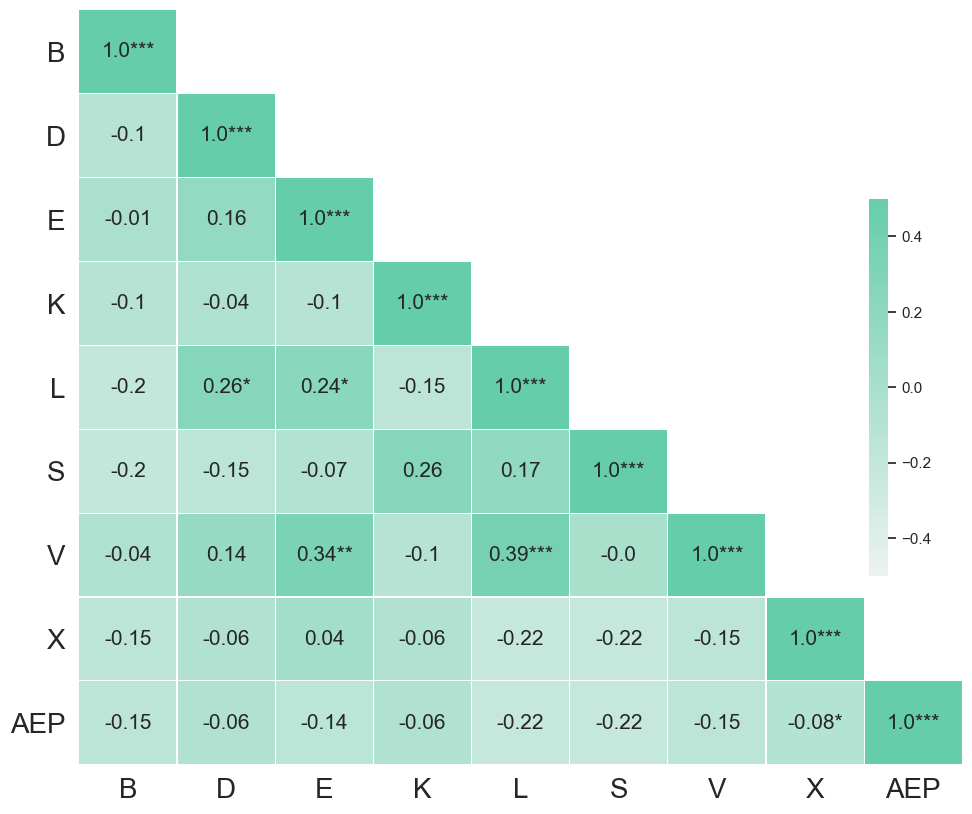

In [64]:
#Heatmap with correlation coefficients and p values--dpi 100

sns.set_theme(style="white")
cmap = sns.light_palette("mediumaquamarine", as_cmap=True)

asyn_corr = df_asyn_rearr_wo_AFO.corr(method='spearman').round(2)

#pval
pval_asyn = asyn_corr.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*asyn_corr.shape)

#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval_asyn.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#correlation coefficients + p values
asyn_corr_p = asyn_corr.astype(str) + p
asyn_corr_p_map = asyn_corr_p.to_numpy()


#plot the heatmap
df_asyn_corr_p = asyn_corr.where(np.tril(np.ones(asyn_corr.shape)).astype(np.bool_))

f, ax = plt.subplots(figsize=(12, 10), dpi=100)

g_asyn = sns.heatmap(df_asyn_corr_p, annot=asyn_corr_p_map, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=False, linewidths=.1,
                cbar_kws={"shrink": 0.5, "pad": -0.1}, annot_kws={"size":15}, 
                fmt='')

plt.setp(g_asyn.yaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.setp(g_asyn.xaxis.get_majorticklabels(), rotation=0, fontsize=20)

plt.show()

In [66]:
df_tdp43 = pd.read_excel('Supplementary Data 1.xlsx', sheet_name = 'TDP43')
df_tdp43 = df_tdp43.set_index('position of P1 site in protein')

In [67]:
df_tdp43.head(2)

,CTSL_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSK_pH 4.5,CTSF_pH 4.5,CTSV_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSS_pH 4.5_pH 5.5,CTSO_pH 5.5,AEP_pH 4.5_pH 5.5,CTSX_pH 3.4_pH 4.5,CTSA_pH 4.5
position of P1 site in protein,,,,,,,,,,,,
2,1,0,0,0,0,1,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [68]:
df_tdp43_rearr = df_tdp43.reindex(columns=CTS_type)
df_tdp43_rearr.head(2)

,CTSA_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSF_pH 4.5,CTSK_pH 4.5,CTSL_pH 4.5_pH 5.5,CTSO_pH 5.5,CTSS_pH 4.5_pH 5.5,CTSV_pH 3.4_pH 4.5,CTSX_pH 3.4_pH 4.5,AEP_pH 4.5_pH 5.5
position of P1 site in protein,,,,,,,,,,,,
2,0,0,0,1,0,0,1,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [69]:
df_tdp43_rearr.rename(columns = {'CTSA_pH 4.5':'A',
            'CTSB_pH 4.5_pH 5.5':'B',
            'CTSD_pH 3.4_pH 4.5':'D', 
            'CTSE_pH 3.4_pH 4.5':'E',  
            'CTSF_pH 4.5':'F',
            'CTSK_pH 4.5':'K', 
            'CTSL_pH 4.5_pH 5.5':'L', 
            'CTSO_pH 5.5':'O',
            'CTSS_pH 4.5_pH 5.5':'S', 
            'CTSV_pH 3.4_pH 4.5':'V', 
            'CTSX_pH 3.4_pH 4.5':'X',
            'AEP_pH 4.5_pH 5.5':'AEP'}, 
                                   inplace = True)
df_tdp43_rearr.head(5)

,A,B,D,E,F,K,L,O,S,V,X,AEP
position of P1 site in protein,,,,,,,,,,,,
2,0,0,0,1,0,0,1,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,1,0,1,1,0,0
8,0,0,0,0,0,0,0,0,1,1,0,0
10,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
#TDP43 correlation plot
tdp43_corr = df_tdp43_rearr.corr()

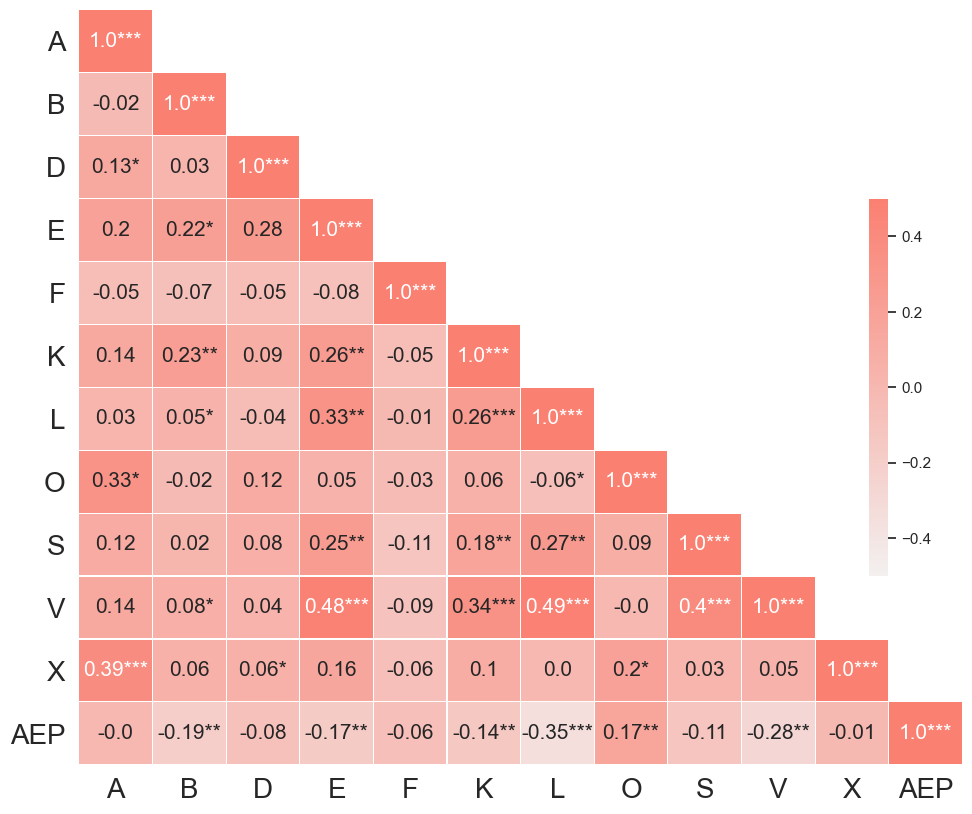

In [71]:
#Heatmap with correlation coefficients and p values--dpi 100

sns.set_theme(style="white")
cmap = sns.light_palette("salmon", as_cmap=True)
tdp43_corr = df_tdp43_rearr.corr(method='spearman').round(2)

#pval
pval_tdp43 = tdp43_corr.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*tdp43_corr.shape)

#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval_tdp43.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#correlation coefficients + p values
tdp43_corr_p = tdp43_corr.astype(str) + p
tdp43_corr_p_map = tdp43_corr_p.to_numpy()


#plot the heatmap
df_tdp43_corr_p = tdp43_corr.where(np.tril(np.ones(tdp43_corr.shape)).astype(np.bool_))

f, ax = plt.subplots(figsize=(12, 10), dpi=100)

g_tdp43 = sns.heatmap(df_tdp43_corr_p, annot=tdp43_corr_p_map, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=False, linewidths=.1,
                cbar_kws={"shrink": 0.5, "pad": -0.1}, annot_kws={"size":15}, 
                fmt='')

plt.setp(g_tdp43.yaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.setp(g_tdp43.xaxis.get_majorticklabels(), rotation=0, fontsize=20)

plt.show()

In [72]:
df_tau = pd.read_excel('Supplementary Data 1.xlsx', sheet_name = 'Tau')
df_tau = df_tau.set_index('position of P1 site in protein')

In [73]:
df_tau.head(2)

,CTSL_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSK_pH 4.5,CTSF_pH 4.5,CTSV_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSS_pH 4.5_pH 5.5,CTSO_pH 5.5,AEP_pH 4.5_pH 5.5,CTSX_pH 3.4_pH 4.5,CTSA_pH 4.5
position of P1 site in protein,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0


In [74]:
df_tau_rearr = df_tau.reindex(columns=CTS_type)
df_tau_rearr.head(2)

,CTSA_pH 4.5,CTSB_pH 4.5_pH 5.5,CTSD_pH 3.4_pH 4.5,CTSE_pH 3.4_pH 4.5,CTSF_pH 4.5,CTSK_pH 4.5,CTSL_pH 4.5_pH 5.5,CTSO_pH 5.5,CTSS_pH 4.5_pH 5.5,CTSV_pH 3.4_pH 4.5,CTSX_pH 3.4_pH 4.5,AEP_pH 4.5_pH 5.5
position of P1 site in protein,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,1,1,0,0


In [75]:
df_tau_rearr.rename(columns = {'CTSA_pH 4.5':'A',
            'CTSB_pH 4.5_pH 5.5':'B',
            'CTSD_pH 3.4_pH 4.5':'D', 
            'CTSE_pH 3.4_pH 4.5':'E',  
            'CTSF_pH 4.5':'F',
            'CTSK_pH 4.5':'K', 
            'CTSL_pH 4.5_pH 5.5':'L', 
            'CTSO_pH 5.5':'O',
            'CTSS_pH 4.5_pH 5.5':'S', 
            'CTSV_pH 3.4_pH 4.5':'V', 
            'CTSX_pH 3.4_pH 4.5':'X',
            'AEP_pH 4.5_pH 5.5':'AEP'}, 
                                   inplace = True)
df_tau_rearr.head(5)

,A,B,D,E,F,K,L,O,S,V,X,AEP
position of P1 site in protein,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,1,0,0,0


In [76]:
#Tau correlation plot
tau_corr = df_tau_rearr.corr()

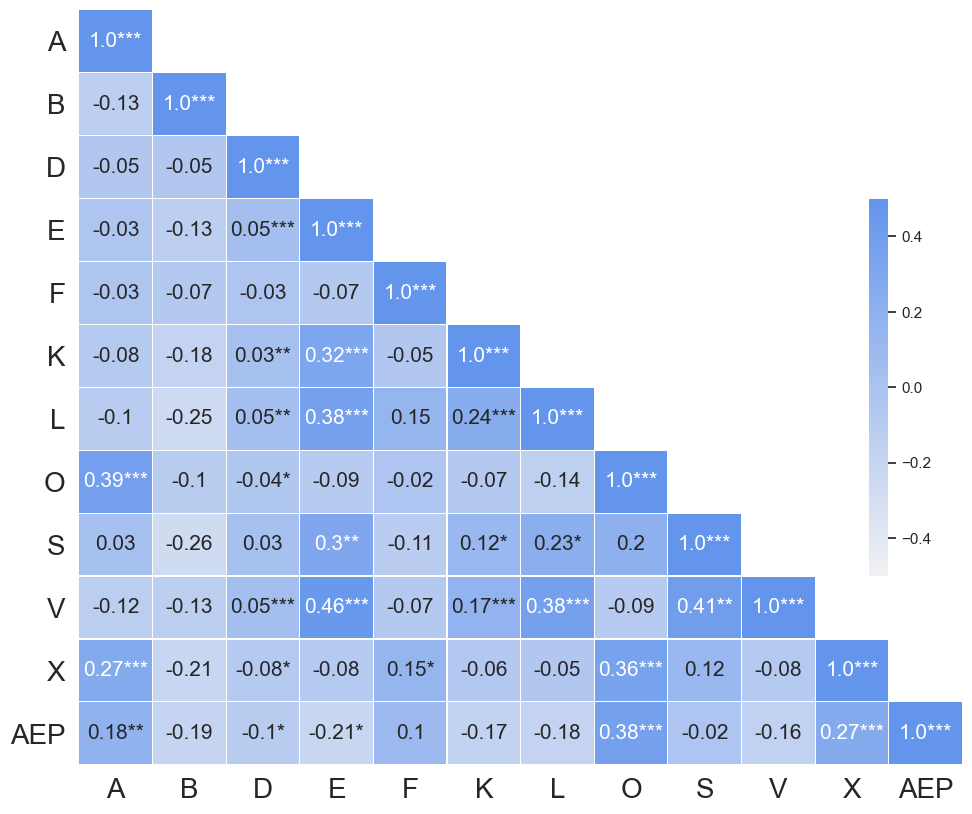

In [77]:
#Heatmap with correlation coefficients and p values--dpi 100

sns.set_theme(style="white")
cmap = sns.light_palette("cornflowerblue", as_cmap=True)
tau_corr = df_tau_rearr.corr(method='spearman').round(2)

#pval
pval_tau = tau_corr.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*tau_corr.shape)

#set the p values, *** for less than 0.001, ** for less than 0.01, * for less than 0.05
p = pval_tau.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

#correlation coefficients + p values
tau_corr_p = tau_corr.astype(str) + p
tau_corr_p_map = tau_corr_p.to_numpy()


#plot the heatmap
df_tau_corr_p = tau_corr.where(np.tril(np.ones(tau_corr.shape)).astype(np.bool_))

f, ax = plt.subplots(figsize=(12, 10), dpi=100)

g_tau = sns.heatmap(df_tau_corr_p, annot=tau_corr_p_map, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=False, linewidths=.1,
                cbar_kws={"shrink": 0.5, "pad": -0.1}, annot_kws={"size":15}, 
                fmt='')

plt.setp(g_tau.yaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.setp(g_tau.xaxis.get_majorticklabels(), rotation=0, fontsize=20)

plt.show()